<a href="https://colab.research.google.com/github/vitesempl/RK-IDE-Python/blob/master/main_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### To solve integro-differential equations with discrete delays use the function "ide_delay_solve". If there are no such delays, use "ide_solve"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWijcfotdTmvhUgJxROzHpTwl1yI8o0fCtAiDKzXWC0y1iiEafrR-Pw
Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Work/Programming/Colab Notebooks/RungeKutta')

In [ ]:
from RK.ide import ide_solve, ide_delay_solve
from math   import exp, sin, cos, pi, log, log10
import numpy as np
import matplotlib.pyplot as plt

## Definition of function for output 

In [ ]:
def Output(isHasDelays,ifOrderCalc):
  stepsize = 1e-2
  if isHasDelays:
    sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,stepsize)
  else:
    sol = ide_solve(idefun,K,delays_int,history,tspan,stepsize)
  
  nz = np.size(history(tspan[0]))
  if nz == 1:
    print("y(",tspan[1],") = ", sol[1][-1],sep='')
  else:
    for i in range(nz):
      print("y",i+1,"(",tspan[1],") = ", sol[1][i,-1],sep='')

  if ifOrderCalc:
    plt.rcParams['figure.figsize'] = [10, 5]
    fig, axs = plt.subplots(1,2)

    if nz == 1:
      axs[0].plot(sol[0], sol[1], label="y(t)")
    else:
      for i in range(nz):
        axs[0].plot(sol[0], sol[1][i],label="y"+str(i+1)+"(t)")
    axs[0].grid()
    axs[0].set_title("NUMERICAL SOLUTION")
    axs[0].legend(loc='upper left',fontsize=12)
    axs[0].set_xlabel("TIME", fontsize=14); axs[0].set_ylabel("SOLUTION", fontsize=14)

    nb = 1; n = 8
    err = []; nsteps = []
  
    for steppow in range(nb,n):
        stepsize = pow(2,-steppow)
        if isHasDelays:
          sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,stepsize)
        else:
          sol = ide_solve(idefun,K,delays_int,history,tspan,stepsize)
        err.append(abs(analytic_sol - sol[1][-1]))
        nsteps.append(stepsize)
  
    print("Convergence order:",(log10(err[-1])-log10(err[-2]))/(log10(pow(2,-n))-log10(pow(2,-n+1))))
  
    axs[1].plot(nsteps,err); axs[1].grid();

    axs[1].set_title("CONVERGENCE ORDER"); 
    axs[1].set_xscale('log'); axs[1].set_yscale('log')
    axs[1].set_xlabel("STEPSIZE", fontsize=14); axs[1].set_ylabel("ERROR", fontsize=14)
        
    fig.tight_layout()
  else:
    plt.rcParams['figure.figsize'] = [9, 5]
    if nz == 1:
      fig = plt.plot(sol[0], sol[1], label="y(t)")
    else:
      for i in range(nz):
        fig = plt.plot(sol[0], sol[1][i], label="y"+str(i+1)+"(t)")
    plt.title("NUMERICAL SOLUTION"); 
    plt.legend(fontsize=14,bbox_to_anchor=(1, 1))
    plt.xlabel("TIME", fontsize=14); plt.ylabel("SOLUTION", fontsize=14); plt.grid()

## Example 1 (only integral)

y(5) = 148.41315925335257


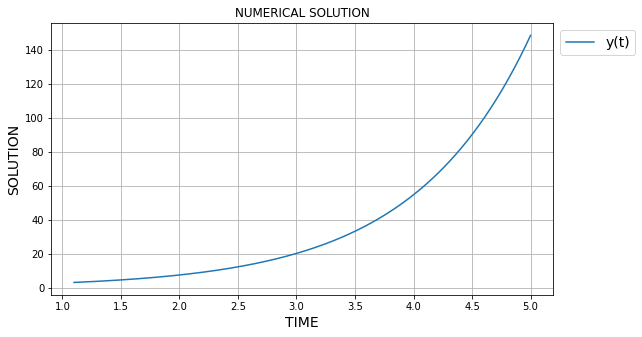

In [ ]:
tspan      = [1.1, 5]
idefun     = lambda t,y,i: ((t-1)*exp(t*t)*i)/(exp(-1)*y-1)
K          = lambda t,s,y: [y*exp(-s*t)]
delays_int = lambda t:     [t-1] # delays of integrals
history    = lambda t:     exp(t)
 
def fun(t):
    return exp(t)
analytic_sol   = fun(tspan[1])
 
Output(0,0)

y(5) = 148.41315925335257
Convergence order: 3.9992668662883673


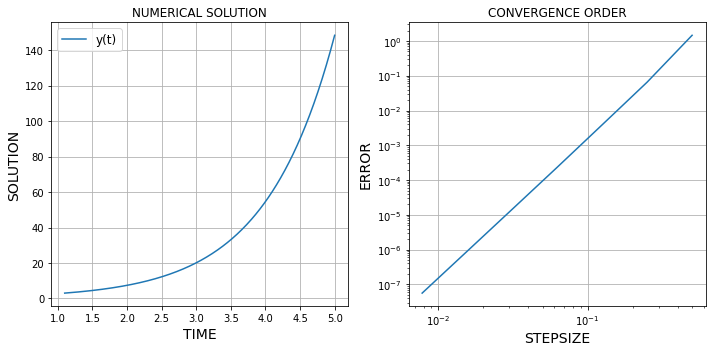

In [ ]:
Output(0,1)

## Example 2 (integral+discrete delays)

y(10) = -0.8390715237122075
Convergence order: 3.9714193848460537


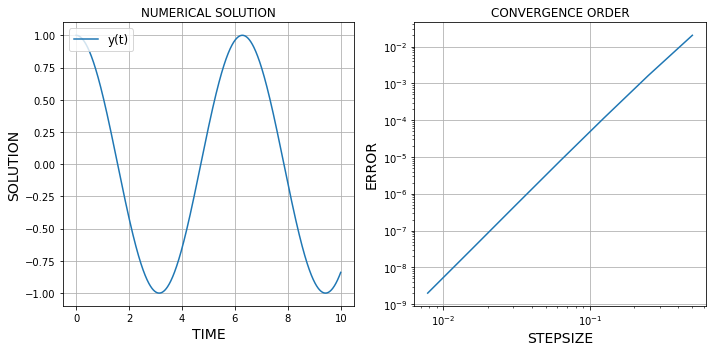

In [ ]:
tspan      = [0, 10]
idefun     = lambda t,y,z,i: (1+exp(-pi/2))*y-exp(-pi/2)*z-2*exp(-2*t)*i
K          = lambda t,s,y:   [y*exp(t+s)]
delays     = lambda t,y:     [t-pi/2] # delays of z
delays_int = lambda t:       [t-pi/2]
history    = lambda t:       cos(t)

def fun(t):
    return cos(t)
analytic_sol   = fun(tspan[1])

Output(1,1)

## Example 3 (integral+discrete delays+overlapping)

y(5) = 0.0067379469814580545
Convergence order: 3.9907520476747815


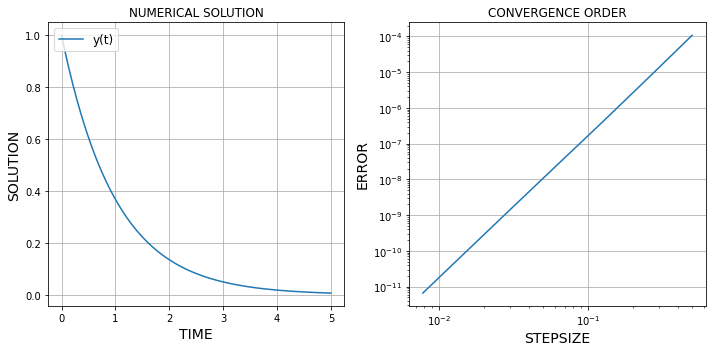

In [ ]:
tspan      = [0, 5]
idefun     = lambda t,y,z,i: -y*y-t*exp(t*t)*pow(z,4)*i
K          = lambda t,s,y:   [y*exp(s-s*t)]
delays     = lambda t,y:     [t/2]
delays_int = lambda t:       [t-1]
history    = lambda t:       exp(-t)

def fun(t):
    return exp(-t)
analytic_sol   = fun(tspan[1])

Output(1,1)

## Example 4 (2 integrals)



y(5) = 148.41315915325342
Convergence order: 3.98591321803516


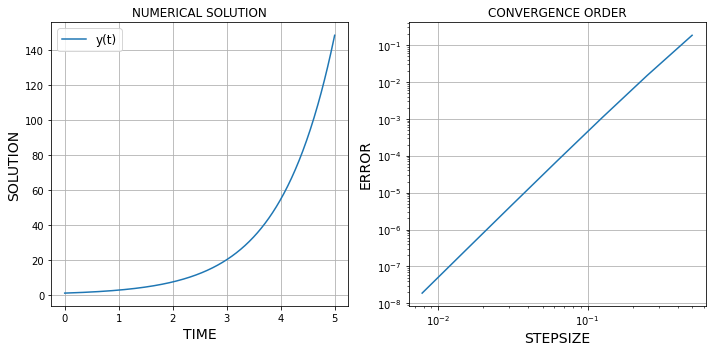

In [ ]:
tspan      = [0, 5]
idefun     = lambda t,y,z,i: exp(1)-exp(t*t)/(z*z)*(i[0]-exp(-2*t)*i[1])*(t-1)
K          = lambda t,s,y:   [y*exp(-s*t),
                              y*exp(t*(2-s))]
delays     = lambda t,y:     [t-1]
delays_int = lambda t:       [t-1,
                              t-2]
history    = lambda t:       exp(t)

def fun(t):
    return exp(t)
analytic_sol   = fun(tspan[1])

Output(1,1)

## Example 5 (2 discrete delays)

y(5) = 0.006737947029428378
Convergence order: 4.03407558307881


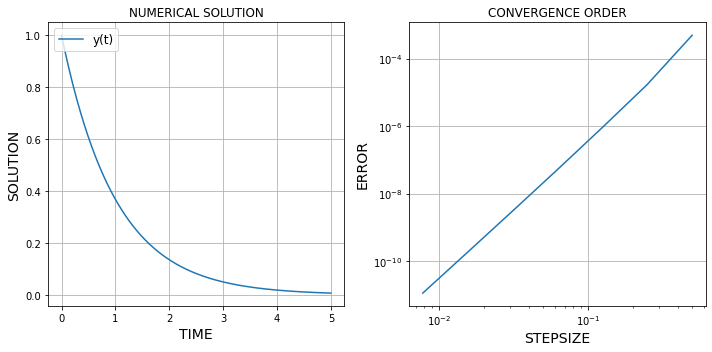

In [ ]:
tspan      = [0, 5]
idefun     = lambda t,y,z,i: -pow(z[0,0],(t+1)/2) * z[0,1] * y*y * (1+exp(t*t)*t*i) / exp(1/2)
K          = lambda t,s,y:   [y*exp(s-s*t)]
delays     = lambda t,y:     [pow(log(y),2) / (t+1) - 1/2,
                              (t-1)/4 ]
delays_int = lambda t:       [t/2-1]
history    = lambda t:       exp(-t)

def fun(t):
    return exp(-t)
analytic_sol   = fun(tspan[1])

Output(1,1)

## Example 6 (system of equations)

y1(10) = 0.004329876789507738
y2(10) = -9.145191243868801
y3(10) = 22.026465794883663


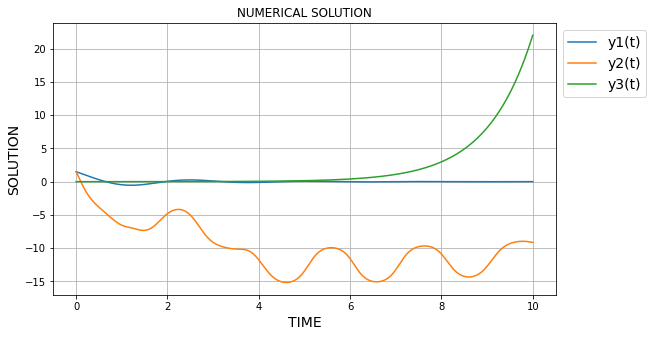

In [ ]:
tspan      = [0, 10]
idefun     = lambda t,y,i: [-2.5*i[0],
                            -15*i[1],
                            0.001*exp(t)]
K          = lambda t,s,y: [sin(y[0]),
                            sin(y[1])]
delays_int = lambda t:     [t-1,
                            t-1]
history    = lambda t:     [1.5,
                            1.5,
                            0.001*exp(t)]

Output(0,0)

## Examples (Yukihiko)

y(25) = -2.0422322898267566


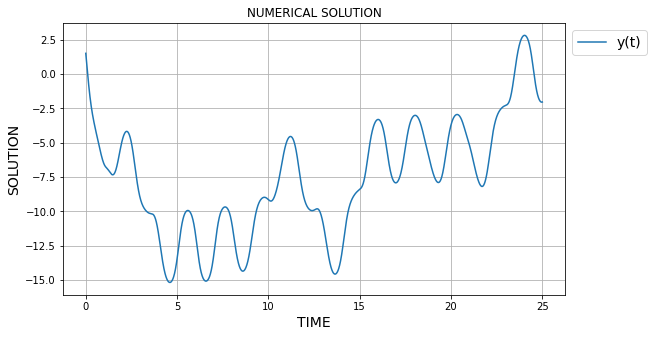

In [ ]:
tspan      = [0, 25]
idefun     = lambda t,y,i: -15*i
K          = lambda t,s,y: [sin(y)]
delays_int = lambda t:     [t-1]
history    = lambda t:     1.5

Output(0,0)

y(25) = -1.2167450865667762


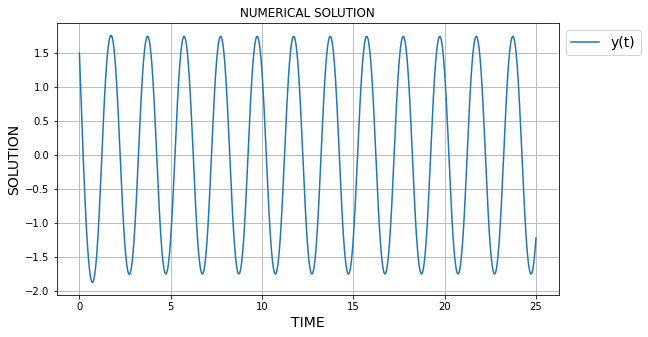

In [ ]:
idefun = lambda t,y,i:  -7.5*i
Output(0,0)

y(25) = 8.176591500707306e-07


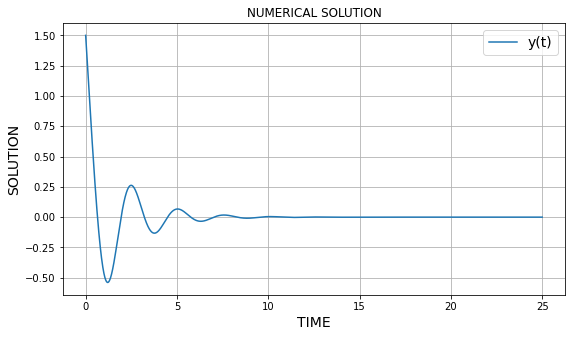

In [ ]:
idefun = lambda t,y,i:  -2.5*i
Output(0,0)

y1(25) = 8.176591500707301e-07
y2(25) = -1.216745086566778
y3(25) = -2.0422323398058615


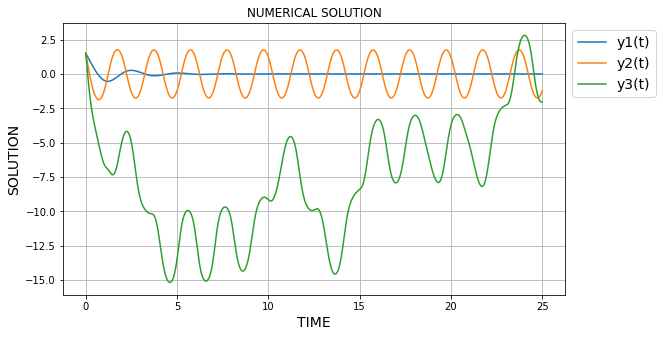

In [ ]:
tspan      = [0, 25]
idefun     = lambda t,y,i: [-2.5*i[0],
                            -7.5*i[1],
                             -15*i[2]]
K          = lambda t,s,y: [sin(y[0]),
                            sin(y[1]),
                            sin(y[2])]
delays_int = lambda t:     [t-1,
                            t-1,
                            t-1]
history    = lambda t:     [1.5,
                            1.5,
                            1.5]

Output(0,0)

## Speed test (5 examples)

In [ ]:
import time

In [ ]:
tspan      = [1.1, 5]
idefun     = lambda t,y,i: ((t-1)*exp(t*t)*i)/(exp(-1)*y-1)
K          = lambda t,s,y: [y*exp(-s*t)]
delays_int = lambda t:     [t-1] # delays of integrals
history    = lambda t:     exp(t)

t = time.time()
sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2)
elapsed = time.time() - t

print("Elapsed time:",elapsed,"seconds")

print("y(",tspan[1],") = ", sol[1][-1],sep='')

Elapsed time: 2.1973483562469482 seconds
y(5) = 148.41315925335257


In [ ]:
tspan      = [0, 5]
idefun     = lambda t,y,z,i: -y*y-t*exp(t*t)*pow(z,4)*i
K          = lambda t,s,y:   [y*exp(s-s*t)]
delays     = lambda t,y:     [t/2]
delays_int = lambda t:       [t-1]
history    = lambda t:       exp(-t)

t = time.time()
sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2)
elapsed = time.time() - t

print("Elapsed time:",elapsed,"seconds")

print("y(",tspan[1],") = ", sol[1][-1],sep='')

Elapsed time: 3.006424903869629 seconds
y(5) = 0.0067379469814580545


In [ ]:
tspan      = [0, 5]
idefun     = lambda t,y,z,i: exp(1)-exp(t*t)/(z*z)*(i[0]-exp(-2*t)*i[1])*(t-1)
K          = lambda t,s,y:   [y*exp(-s*t),
                              y*exp(t*(2-s))]
delays     = lambda t,y:     [t-1]
delays_int = lambda t:       [t-1,
                              t-2]
history    = lambda t:       exp(t)

t = time.time()
sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2)
elapsed = time.time() - t

print("Elapsed time:",elapsed,"seconds")

print("y(",tspan[1],") = ", sol[1][-1],sep='')

Elapsed time: 8.960109233856201 seconds
y(5) = 148.41315915325342


In [ ]:
tspan      = [0, 5]
idefun     = lambda t,y,z,i: -pow(z[0,0],(t+1)/2) * z[0,1] * y*y * (1+exp(t*t)*t*i) / exp(1/2)
K          = lambda t,s,y:   [y*exp(s-s*t)]
delays     = lambda t,y:     [pow(log(y),2) / (t+1) - 1/2,
                              (t-1)/4 ]
delays_int = lambda t:       [t/2-1]
history    = lambda t:       exp(-t)

t = time.time()
sol = ide_delay_solve(idefun,delays,K,delays_int,history,tspan,1e-2)
elapsed = time.time() - t

print("Elapsed time:",elapsed,"seconds")

print("y(",tspan[1],") = ", sol[1][-1],sep='')

Elapsed time: 6.74242901802063 seconds
y(5) = 0.006737947029428378


In [ ]:
tspan      = [0, 10]
idefun     = lambda t,y,i: [-2.5*i[0],
                            -15*i[1],
                            0.001*exp(t)]
K          = lambda t,s,y: [sin(y[0]),
                            sin(y[1])]
delays_int = lambda t:     [t-1,
                            t-1]
history    = lambda t:     [1.5,
                            1.5,
                            0.001*exp(t)]

t = time.time()
sol = ide_solve(idefun,K,delays_int,history,tspan,1e-2)
elapsed = time.time() - t

print("Elapsed time:",elapsed,"seconds")

for i in range(np.size(history(tspan[0]))):
  print("y",i+1,"(",tspan[1],") = ", sol[1][i,-1],sep='')

Elapsed time: 11.227380514144897 seconds
y1(10) = 0.004329876789507738
y2(10) = -9.145191243868801
y3(10) = 22.026465794883663
